### 教師なし学習の例~ ワインの分類 ~

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_wine
data = load_wine()

In [8]:
# データ読み込み、整形
data_x = pd.DataFrame(data.data, columns=data.feature_names)
data_t = pd.DataFrame(data.target, columns=["class"])
data_df = pd.concat([data_x, data_t], axis=1)

In [9]:
# データの一部を表示して確認
display(data_df.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [10]:
# 特徴量（説明変数）を2つ選ぶ
X = data_df.iloc[:,[0,9]]
display(X)

,alcohol,color_intensity
0,14.23,5.64
1,13.20,4.38
2,13.16,5.68
3,14.37,7.80
4,13.24,4.32
...,...,...
173,13.71,7.70
174,13.40,7.30
175,13.27,10.20
176,13.17,9.30


Text(0.5, 1.0, 'How to devide ?')

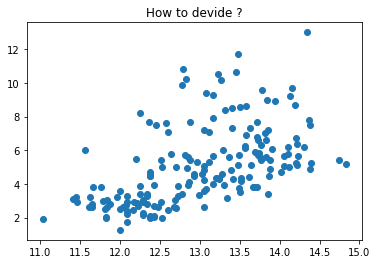

In [11]:
# データの可視化（つまり、グラフ作成）
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.title("How to devide ?")

### 以下では、scikit-learnを使って教師なし学習+ 分類をする

In [12]:
from sklearn.cluster import KMeans
n_clusters = 2
model = KMeans(n_clusters=n_clusters)

In [13]:
## 学習
model.fit(X)

## 予測
pred = model.predict(X)

## 教科書では、学習と予測をいっぺんに行っている
##model.fit_predict(X)

In [14]:
## 予測値を確認
ans_df = pd.concat([X, pd.DataFrame(pred, columns=["pred"])], axis=1)
ans_df.head()

,alcohol,color_intensity,pred
0,14.23,5.64,0
1,13.20,4.38,0
2,13.16,5.68,0
3,14.37,7.80,1
4,13.24,4.32,0


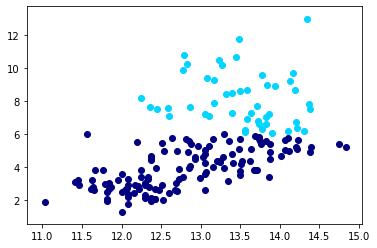

In [15]:
## 予測値をグラフで確認
colors = cm.jet(pred/3)
for x1, x2, c in zip(X.iloc[:,0], X.iloc[:,1], colors):
    plt.scatter(x1, x2, color=c)